In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

Read the Data

In [3]:
df = pd.read_csv("nypd-motor-vehicle-collisions.csv")

In [4]:
df.columns

Index(['ACCIDENT DATE', 'ACCIDENT TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [5]:
# Person specific columns
selected_columns = [
       'ACCIDENT DATE', 'ACCIDENT TIME',
       'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']
df_selected = df[selected_columns]
df_selected['ACCIDENT DATE'] = df_selected['ACCIDENT DATE'].str[:10]
df_selected['ACCIDENT DATE'] = pd.to_datetime(df_selected['ACCIDENT DATE'], yearfirst = True)

In [6]:
df_selected.head()

,ACCIDENT DATE,ACCIDENT TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,2019-08-05,16:30,0.0,0.0,0,0,0,0,0,0
1,2019-08-27,16:02,0.0,0.0,0,0,0,0,0,0
2,2019-08-15,17:57,1.0,0.0,0,0,0,0,1,0
3,2019-08-30,21:53,0.0,0.0,0,0,0,0,0,0
4,2019-08-06,9:45,1.0,0.0,0,0,1,0,0,0


In [7]:
df_selected.describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,1.612161e+06,1.612145e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06
mean,2.631363e-01,1.185998e-03,5.060483e-02,6.302034e-04,2.098590e-02,9.242156e-05,1.916854e-01,4.633483e-04
std,6.584832e-01,3.644859e-02,2.316972e-01,2.577872e-02,1.445222e-01,9.677481e-03,6.206497e-01,2.334547e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.100000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,3.100000e+01,5.000000e+00


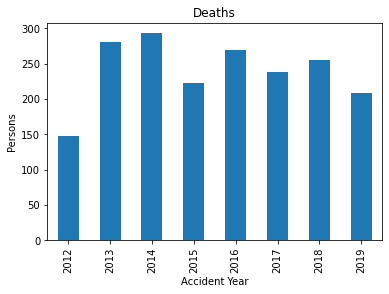

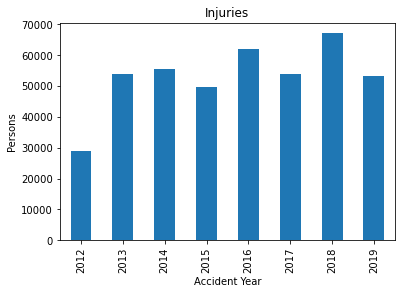

In [8]:
yearly_death = df_selected.groupby(df_selected['ACCIDENT DATE'].dt.year)['NUMBER OF PERSONS KILLED'].sum()
yearly_death.plot(kind='bar', title='Deaths', xlabel='Accident Year', ylabel='Persons')
plt.show()

yearly_injury = df_selected.groupby(df_selected['ACCIDENT DATE'].dt.year)['NUMBER OF PERSONS INJURED'].sum()
yearly_injury.plot(kind='bar', title='Injuries', xlabel='Accident Year', ylabel='Persons')
plt.show()

In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_selected['ACCIDENT MONTH'] = df_selected['ACCIDENT DATE'].dt.month.transform(lambda x : months[x-1])

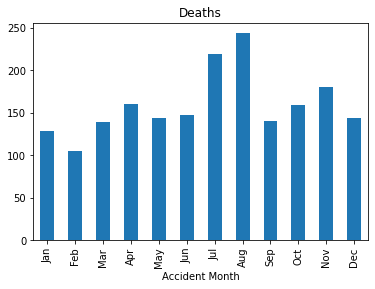

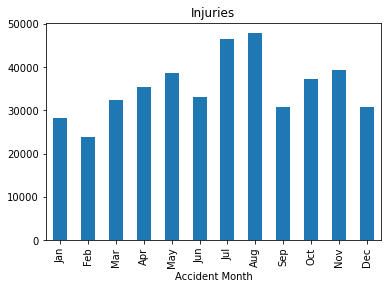

In [30]:
monthly_death = df_selected.groupby('ACCIDENT MONTH')['NUMBER OF PERSONS KILLED'].sum()
monthly_death = monthly_death.sort_index(key=lambda x: pd.to_datetime(x, format="%b"))
monthly_death.plot(kind='bar', title='Deaths', xlabel='Accident Month')
plt.show()

monthly_death = df_selected.groupby('ACCIDENT MONTH')['NUMBER OF PERSONS INJURED'].sum()
monthly_death = monthly_death.sort_index(key=lambda x: pd.to_datetime(x, format="%b"))
monthly_death.plot(kind='bar', title='Injuries', xlabel='Accident Month')
plt.show()

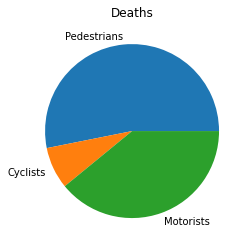

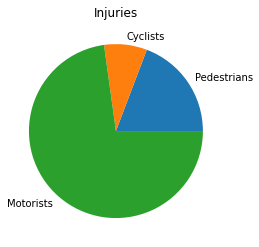

In [10]:
deaths =  df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']]
deaths.columns = ['Pedestrians', 'Cyclists', 'Motorists']
deaths.sum().plot(kind='pie', title="Deaths", ylabel="")
plt.show()

injuries =  df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']]
injuries.columns = ['Pedestrians', 'Cyclists', 'Motorists']
injuries.sum().plot(kind='pie', title="Injuries", ylabel="")
plt.show()